In [21]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import  griddata

import lmfit
from lmfit.lineshapes import  gaussian2d, lorentzian

In [29]:
npoints = 10000
np.random.seed(2021)
x = np.random.rand(npoints)*10 - 4
y = np.random.rand(npoints)*5 - 3
z = gaussian2d(x, y, amplitude=30, centerx=2, centery=-.5, sigmax=.6, sigmay=.8)
z += 2*(np.random.rand(*z.shape)-.5)
error = np.sqrt(z+1)

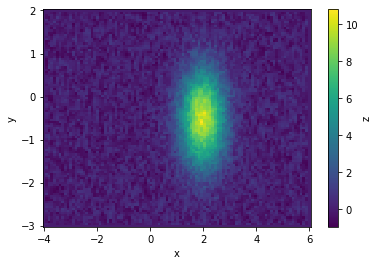

In [30]:
X, Y = np.meshgrid(np.linspace(x.min(), x.max(), 100), np.linspace(y.min(), y.max(), 100))
Z = griddata((x,y), z, (X, Y), method='linear', fill_value=0)

fig, ax = plt.subplots()
art = ax.pcolor(X, Y, Z, shading='auto')
plt.colorbar(art, ax=ax, label='z')
ax.set_xlabel('x')
ax.set_ylabel('y')
plt.show()

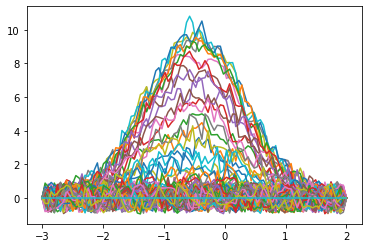

In [38]:
plt.plot(Y, Z)
plt.show()

In [40]:
X.shape

(100, 100)

In [14]:
model = lmfit.models.Gaussian2dModel()
params = model.guess(z, x, y)
result = model.fit(z, x=x, y=y, params=params, weight=1/error)
lmfit.report_fit(result)

[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 31
    # data points      = 10000
    # variables        = 5
    chi-square         = 3354.78259
    reduced chi-square = 0.33564608
    Akaike info crit   = -10911.9813
    Bayesian info crit = -10875.9296
[[Variables]]
    amplitude:  29.9822506 +/- 0.14339256 (0.48%) (init = 16.51399)
    centerx:    1.99472438 +/- 0.00285394 (0.14%) (init = 1.940764)
    centery:   -0.49517402 +/- 0.00387734 (0.78%) (init = -0.5178641)
    sigmax:     0.60165122 +/- 0.00291496 (0.48%) (init = 1.666582)
    sigmay:     0.79999302 +/- 0.00385823 (0.48%) (init = 0.8332836)
    fwhmx:      1.41678033 +/- 0.00686422 (0.48%) == '2.3548200*sigmax'
    fwhmy:      1.88383957 +/- 0.00908544 (0.48%) == '2.3548200*sigmay'
    height:     97.8482579 +/- 0.47400027 (0.48%) == '1.5707963*amplitude/(max(1e-15, sigmax)*max(1e-15, sigmay))'
[[Correlations]] (unreported correlations are < 0.100)
    C(amplitude, sigmay) = 0.502
    C(amplit

In [15]:

from astropy.io import fits

In [140]:

# basePath = '/media/al-chromebook/USB20FD/Python/Research/fits/Full Maps/'
basePath = '/media/al-linux/USB20FD/Python/Research/fits/Full Maps/'
sofia_full = basePath + 'F0217_FO_IMA_70030015_FORF253_MOS_0001-0348_final_MATT_Corrected.fits'
hdu = fits.open(sofia_full)[0]
sofia_full_image = hdu.data

In [182]:
xs= sofia_full_image[:3480, 1146]

In [132]:
z = gaussian2d(xs, amplitude=6, centerx=.2, centery=-.5, sigmax=.6, sigmay=.8)
z += 2*(np.random.rand(*z.shape)-.5)
error = np.sqrt(z+1)

In [133]:

z = gaussian2d(x, y, amplitude=30, centerx=2, centery=-.5, sigmax=.6, sigmay=.8)
z += 2*(np.random.rand(*z.shape)-.5)
error = np.sqrt(z+1)

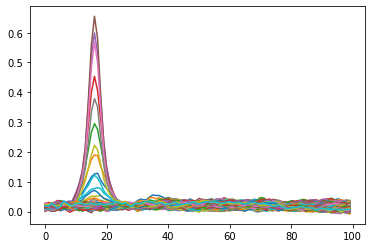

In [134]:
# x,y = sofia_full_image[:100], sofia_full_image[:100,:100]
xy = sofia_full_image[3400:3500, 1100:1200] 
plt.plot(xy)

In [135]:
X, Y = np.meshgrid(np.linspace(x.min(), x.max(), 100), np.linspace(y.min(), y.max(), 100))
Z = griddata((x,y), z, (X, Y), method='linear', fill_value=0)

fig, ax = plt.subplots()
art = ax.pcolor(X, Y, Z, shading='auto')
plt.colorbar(art, ax=ax, label='z')
ax.set_xlabel('x')
ax.set_ylabel('y')
plt.show()

ValueError: invalid shape for input data points

In [ ]:
from astropy.modeling import models

In [232]:
xy = sofia_full_image[3400:3500, 1100:1200]
z = gaussian2d(xy, amplitude=30, centerx=2, centery=-.5, sigmax=.6, sigmay=.8)
z += 2*(np.random.rand(*z.shape)-.5)
error = np.sqrt(z+1)

array([0.02560333, 0.02293031, 0.02724306, 0.02354248, 0.02572004,
       0.02314756, 0.02110425, 0.01902058, 0.0173634 , 0.01757302,
       0.02037857, 0.02341483, 0.02010178, 0.02327796, 0.02347672,
       0.02027689, 0.02556166, 0.02021419, 0.01926961, 0.01556391,
       0.01754321, 0.01913885, 0.02223387, 0.02429887, 0.02438728,
       0.02446561, 0.03064218, 0.02885432, 0.026966  , 0.02869846,
       0.03640125, 0.0415861 , 0.0394978 , 0.03997316, 0.04971905,
       0.05559686, 0.05380021, 0.05373048, 0.04936405, 0.04377575,
       0.04727718, 0.04346653, 0.0419794 , 0.04142892, 0.03130327,
       0.02813133, 0.0340176 , 0.04240463, 0.03716806, 0.03418067,
       0.03744762, 0.04000329, 0.03708808, 0.04010433, 0.0420459 ,
       0.03927931, 0.04298377, 0.04233555, 0.03987168, 0.03916956,
       0.0357392 , 0.03462124, 0.03599791, 0.03067419, 0.03212871,
       0.03509232, 0.03546687, 0.03312204, 0.03417435, 0.03608855,
       0.04091221, 0.03607745, 0.03554843, 0.03251414, 0.03247

 ...]

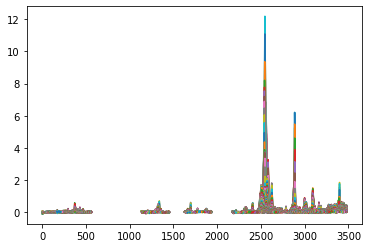

In [189]:
plt.plot(sofia_full_image[3400:3480, 1146])

In [4]:

# import astropy.nddata.utils as utils
# from lineplots import GetNthColumn, GetNthRow
# import numpy as np
# import sympy as sp
# from sympy.abc import A,a,x,y,c,b
# import matplotlib.pyplot as plt
from astropy.io import fits
from scipy.interpolate import  griddata

from astropy.utils.exceptions import AstropyUserWarning
from astropy.modeling import models, fitting
import warnings

import lmfit
from lmfit.lineshapes import  gaussian2d, lorentzian

basePath = '/media/al-chromebook/USB20FD/Python/Research/fits/Full Maps/'
# basePath = '/media/al-linux/USB20FD/Python/Research/fits/Full Maps/'
sofia = 'F0217_FO_IMA_70030015_FORF253_MOS_0001-0348_final_MATT_Corrected.fits'
sofia_full = basePath + 'F0217_FO_IMA_70030015_FORF253_MOS_0001-0348_final_MATT_Corrected.fits'
hdu = fits.open(sofia_full)[0]
sofia_full_image = hdu.data

In [5]:
baseFits_path = '/media/al-chromebook/USB20FD/Python/Research/fits/'
spits_isofield = 'Spitzer24_IsoFields.fits'
chosen_file = baseFits_path + spits_isofield
fits.open()

SIMPLE  =                    T / conforms to FITS standard                      
BITPIX  =                  -64 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =                 3503                                                  
NAXIS2  =                 5639                                                  
EXTEND  =                    T                                                  
OBS_ID  = 'P_2015-07-04_FO_F225B0078' / yyyy_mm_dd_FO_FnnnCmmmm                 
ASSC_OBS= '2015-06-13_FO_F217B0032,2015-06-13_FO_F217B0033,2015-06-13_FO_F217B&'
CONTINUE  '0034,2015-06-13_FO_F217B0035,2015-06-13_FO_F217B0036,2015-06-13_FO_&'
CONTINUE  'F217B0037,2015-06-13_FO_F217B0038,2015-06-13_FO_F217B0039,2015-06-1&'
CONTINUE  '3_FO_F217B0040,2015-06-13_FO_F217B0041,2015-06-13_FO_F217B0042,2015&'
CONTINUE  '-06-13_FO_F217B0043,2015-06-13_FO_F217B0044,2015-06-13_FO_F217B0045&'
CONTINUE  ',2015-06-13_FO_F2

In [20]:
hdu.header['CDELT1']

-0.000213333335188

In [23]:
hdu.header['CDELT2']

0.000213333335188

In [21]:
spits = fits.open(basePath + 'Spitzer_GCmosaic_24um_onFORCASTheader_JyPix.fits')[0]
spits.header['CDELT1']

-0.000213333335188

In [22]:
spits.header['CDELT2']

0.000213333335188